In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
# Gpu 설정 확인

print('GPU infomation -', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU infomation - /device:GPU:0 

Fri Aug  6 05:49:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                       

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# 마운트 확인
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


-rw------- 1 root root 90618980 Mar 31 15:05 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [11]:
# unzip
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [12]:
!ls -l

total 20
drwx------ 5 root root 4096 Aug  6 06:01 drive
drwxr-xr-x 1 root root 4096 Jul 16 13:20 sample_data
drwxr-xr-x 4 root root 4096 Aug  6 06:04 test
drwxr-xr-x 4 root root 4096 Aug  6 06:04 train
drwxr-xr-x 4 root root 4096 Aug  6 06:04 validation


In [15]:
train_dir = 'train'
test_dir = 'test'
valid_dir = 'validation'

In [16]:
# 이미지 인코딩

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [28]:
# model define
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [30]:
# compile

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

In [31]:
%%time

Hist_dandc = model.fit(train_generator, steps_per_epoch=100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 9s 89ms/step - loss: 0.7033 - accuracy: 0.4915 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 9s 86ms/step - loss: 0.6943 - accuracy: 0.5170 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 3/60
100/100 [==============================] - 9s 85ms/step - loss: 0.6908 - accuracy: 0.5260 - val_loss: 0.6862 - val_accuracy: 0.5670
Epoch 4/60
100/100 [==============================] - 8s 85ms/step - loss: 0.6801 - accuracy: 0.5585 - val_loss: 0.6576 - val_accuracy: 0.5970
Epoch 5/60
100/100 [==============================] - 9s 88ms/step - loss: 0.6725 - accuracy: 0.5735 - val_loss: 0.6578 - val_accuracy: 0.5920
Epoch 6/60
100/100 [==============================] - 9s 93ms/step - loss: 0.6381 - accuracy: 0.6195 - val_loss: 0.6608 - val_accuracy: 0.6160
Epoch 7/60
100/100 [==============================] - 9s 93ms/step - loss: 0.6250 - accuracy: 0.6345 - val_loss: 0.5992 - val_accuracy: 0.6810

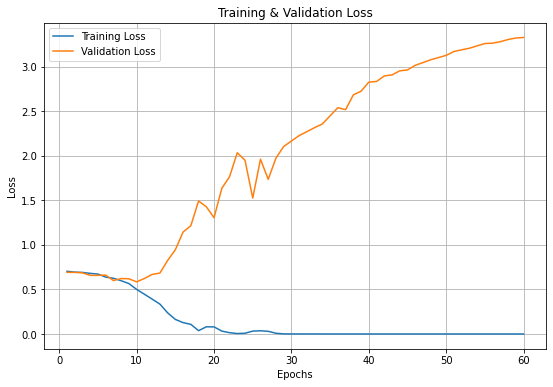

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


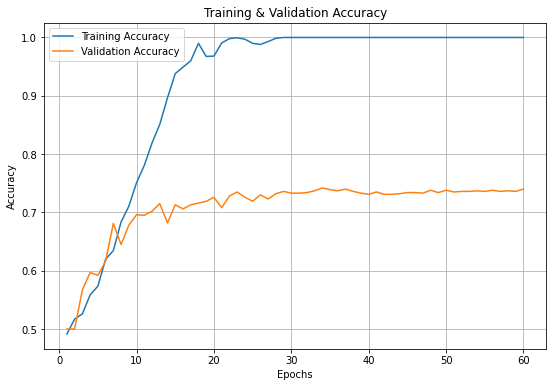

In [33]:
epochs = range(1, len(Hist_dandc.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [34]:
# evaluate
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [35]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 56ms/step - loss: 3.6770 - accuracy: 0.7120
Loss = 3.67696
Accuracy = 0.71200


In [37]:
# drive 에 저장
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40561
-rw------- 1 root root    34600 Aug  4 08:36 001_Model_iris.h5
-rw------- 1 root root 41498784 Aug  6 06:45 002_dogs_and_cats_small.h5


In [40]:
# model load
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

loss, accuracy = model_small.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 51ms/step - loss: 3.6770 - accuracy: 0.7120
Loss = 3.67696
Accuracy = 0.71200
